In [22]:
import networkx as nx
import random
import numpy as np
from itertools import  combinations

{0: 7, 1: 4, 2: 3, 3: 7, 4: 5, 5: 6}


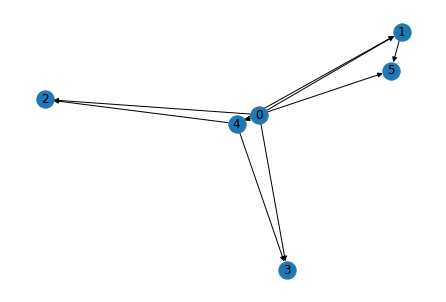

In [228]:
# node = 15
student_number = 2
random.seed = student_number

def GraphGenerator(nodes=None):
    """
    generates a graph
    """
    graph=nx.generators.random_graphs.erdos_renyi_graph(n=nodes, p=0.4, seed=student_number, directed=True)
    for _ in range(nodes):
        graph.nodes[_]['weight'] = random.randint(1,10)
    print(nx.get_node_attributes(graph,'weight'))
    nx.draw(graph, with_labels=True)
    return graph
# graph = GraphGenerator(nodes=5) 



closured_graph = nx.DiGraph()
for _ in range(6):
    closured_graph.add_nodes_from([_], weight=random.randint(_,10))
closured_graph.add_edges_from([(0,1),(0,4),(0,3),(0,2),(4,2),(4,1),(1,5),(4,3),(0,5)])
print(nx.get_node_attributes(closured_graph,'weight'))
nx.draw(closured_graph, with_labels=True)    

In [190]:
def GetPotentialClosures(vertices):
    """
    Return the possible covers for the graph.
    """
    vertices = set(vertices)
    powerset = ([x for i in range(len(vertices)+1) for x in combinations(vertices,i)])
    potential_closures = powerset[1:]

    return potential_closures

In [219]:
def ExhaustiveSearch(graph=None):

    potential_closures = GetPotentialClosures(graph.nodes())
    adjacency_matrix = nx.adjacency_matrix(graph).todense()

    # define initial closure weight and set
    max_closure_set = None
    max_closure_weight = -np.inf
    
    for pclosure in potential_closures:
        
        # check all elements in pclosure is actually a closure
        isClosure = True
        for source in pclosure:

            sum_check = np.sum(adjacency_matrix[source,:])
            if sum_check != 0:
                isClosure = False
                break
        
        if isClosure is True:

            g_weights = nx.get_node_attributes(graph,'weight')
            closure_weight = 0
            for v in pclosure:
                closure_weight += g_weights[v]
            
            # update closure weight if new pclosure weight is bigger than what is there
            if closure_weight > max_closure_weight:
                max_closure_set = pclosure
                max_closure_weight = closure_weight
    
    return max_closure_set, max_closure_weight

In [220]:
graph = closured_graph
ExhaustiveSearch(graph=graph)

((2, 3, 5), 21)